In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [105]:
import os
os.getcwd()

'C:\\Users\\Admin'

In [106]:
pwd

'C:\\Users\\Admin'

# Reading data

In [108]:
data=pd.read_csv("Medicalpremium.csv")

# Problem statement

This dataset contains the data of people about medical history, whether they have a certain medical condition or not, if they have gone through any surgery previously, their age, height and weight.

Based on all this conditions a person pays different amount of Medical Insurance Premium, which is also present in the dataset.

From this data, we have to analyze, what factors are affecting the premium amount.

In [109]:
data.shape

(986, 11)

In [110]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [111]:
data.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


In [112]:
data.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

statistics for the numerical columns:

In [113]:
data.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


For cat var above data does not make any sense.

The ranges of values in the numerical columns seem reasonable

numerical columns (Age,Height,weight,PremiumPrice) seems to be normally distributed 

In [114]:
data.duplicated().sum()

0

# Exploratory data analysis


# 1.Missing data

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


<AxesSubplot:>

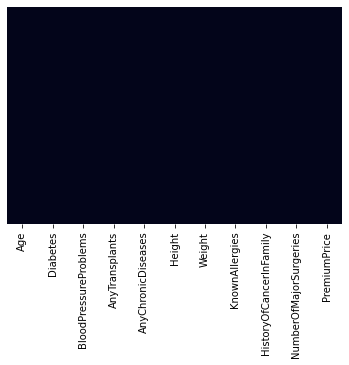

In [116]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

as we can see from info method and heatmap there is no missing value in dataset

In [117]:
data.corr()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.024416,-0.027623,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.080102,-0.055527,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.011550,0.048239,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.001876,-0.020171,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.027418,0.008666,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.010200,0.010549,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.037492,0.003481,-0.006108,0.141507
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,1.000000,0.115383,0.103923,0.012103
HistoryOfCancerInFamily,-0.027623,-0.055527,0.048239,-0.020171,0.008666,0.010549,0.003481,0.115383,1.000000,0.212657,0.083139
NumberOfMajorSurgeries,0.429181,0.122722,0.251568,-0.004154,0.014835,0.037289,-0.006108,0.103923,0.212657,1.000000,0.264250


CATEGORICAL VARIABLE

In [118]:
data['Diabetes'].value_counts()#CATEGORICAL VARIABLE

0    572
1    414
Name: Diabetes, dtype: int64

In [119]:
data['BloodPressureProblems'].value_counts()#CATEGORICAL VARIABLE

0    524
1    462
Name: BloodPressureProblems, dtype: int64

In [120]:
data['AnyTransplants'].value_counts()#CATEGORICAL VARIABLE

0    931
1     55
Name: AnyTransplants, dtype: int64

In [121]:
data['AnyChronicDiseases'].value_counts()#CATEGORICAL VARIABLE

0    808
1    178
Name: AnyChronicDiseases, dtype: int64

In [122]:
data['KnownAllergies'].value_counts()#CATEGORICAL VARIABLE

0    774
1    212
Name: KnownAllergies, dtype: int64

In [123]:
data['HistoryOfCancerInFamily'].value_counts()#CATEGORICAL VARIABLE

0    870
1    116
Name: HistoryOfCancerInFamily, dtype: int64

In [124]:
data['Diabetes'].value_counts()#CATEGORICAL VARIABLE

0    572
1    414
Name: Diabetes, dtype: int64

In [125]:
data['BMI']=(data['Weight']/data['Height']**2)*10000

In [126]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [127]:
PremiumPrice_range=sorted(data['PremiumPrice'].unique())
print(PremiumPrice_range)

[15000, 16000, 17000, 18000, 19000, 20000, 21000, 22000, 23000, 24000, 25000, 26000, 27000, 28000, 29000, 30000, 31000, 32000, 34000, 35000, 36000, 38000, 39000, 40000]


PremiumPrice ranges from 15000 to 40000

<AxesSubplot:xlabel='PremiumPrice', ylabel='Density'>

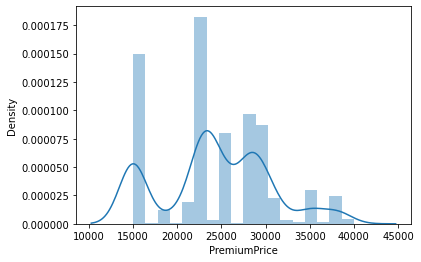

In [128]:
sns.distplot(data['PremiumPrice'])

Premium price is not normally distributed

<AxesSubplot:xlabel='PremiumPrice'>

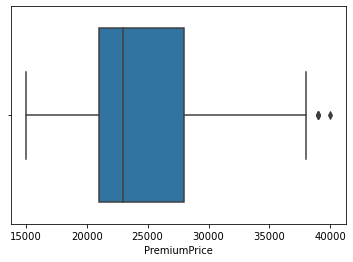

In [129]:
sns.boxplot(data['PremiumPrice'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

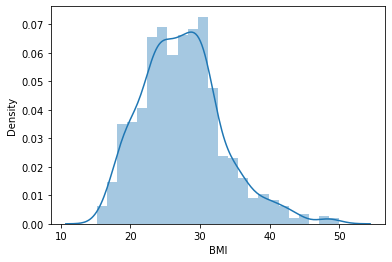

In [130]:
sns.distplot(data['BMI'])

<AxesSubplot:xlabel='BMI'>

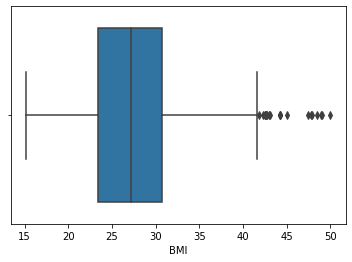

In [131]:
sns.boxplot(data['BMI'])

there are outliers in both premium price and BMI

In [132]:
data['PremiumPrice'].skew()

0.09763944413484053

In [133]:
data['BMI'].skew()

0.6597014833198833

In [134]:
age_range=sorted(data['Age'].unique())
print(age_range)

[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66]


age ranges from 18 to 66.

<AxesSubplot:xlabel='Age', ylabel='Density'>

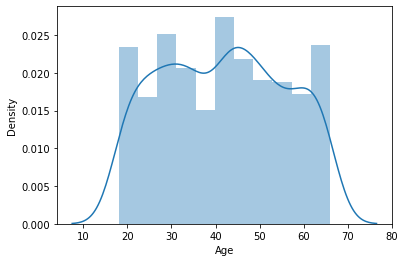

In [135]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age'>

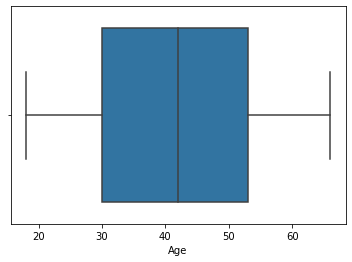

In [136]:
sns.boxplot(data['Age'])

In [137]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


# EDA

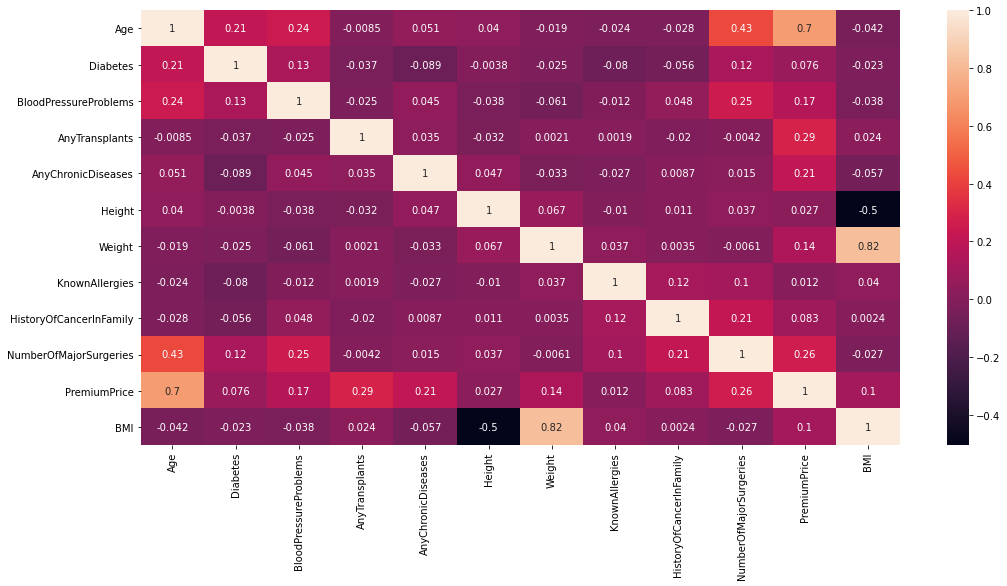

In [138]:
#plotting heatmap

plt.figure(figsize=(17,8))
sns.heatmap(data.corr(),annot = True)
plt.show()

From the heatmap, we see that there is a high correlation between Age of a person and Premium paid by him.

We can also see good correlation between Age to Number of major Surgeries , and to Blood Pressure problems,Diabetes.

Also there are good correlation between Premium price to Any Transplant, Number of Major Surgeries, Any Chronic Disease,age.

<AxesSubplot:xlabel='PremiumPrice', ylabel='NumberOfMajorSurgeries'>

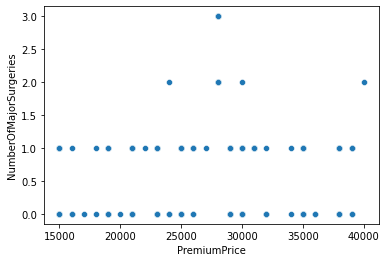

In [139]:
sns.scatterplot(x=data['PremiumPrice'],y=data['NumberOfMajorSurgeries'])

<AxesSubplot:xlabel='PremiumPrice', ylabel='HistoryOfCancerInFamily'>

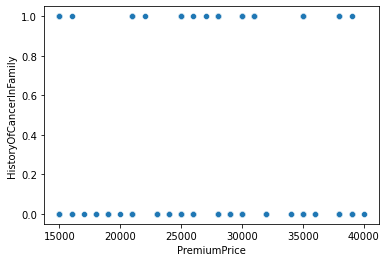

In [140]:
sns.scatterplot(x=data['PremiumPrice'],y=data['HistoryOfCancerInFamily'])

<AxesSubplot:xlabel='PremiumPrice', ylabel='KnownAllergies'>

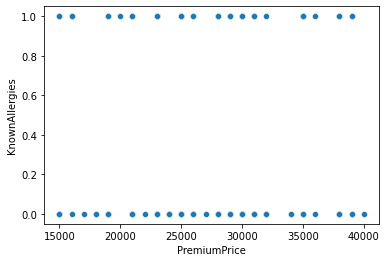

In [141]:
sns.scatterplot(x=data['PremiumPrice'],y=data['KnownAllergies'])

<AxesSubplot:xlabel='PremiumPrice', ylabel='AnyChronicDiseases'>

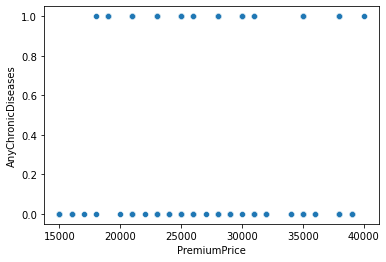

In [142]:
sns.scatterplot(x=data['PremiumPrice'],y=data['AnyChronicDiseases'])

<AxesSubplot:xlabel='PremiumPrice', ylabel='AnyTransplants'>

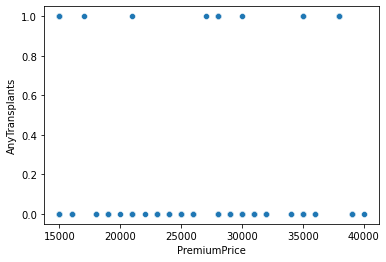

In [143]:
sns.scatterplot(x=data['PremiumPrice'],y=data['AnyTransplants'])

<AxesSubplot:xlabel='PremiumPrice', ylabel='Diabetes'>

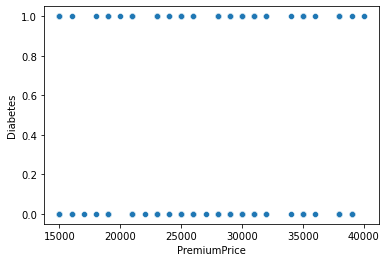

In [144]:
sns.scatterplot(y=data['Diabetes'],x=data['PremiumPrice'])

<AxesSubplot:xlabel='PremiumPrice', ylabel='BloodPressureProblems'>

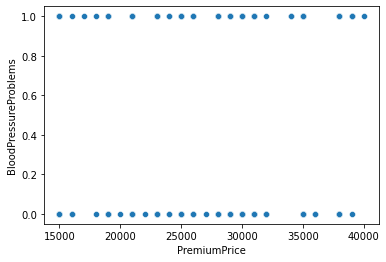

In [145]:
sns.scatterplot(x=data['PremiumPrice'],y=data['BloodPressureProblems'])

<AxesSubplot:xlabel='BMI', ylabel='PremiumPrice'>

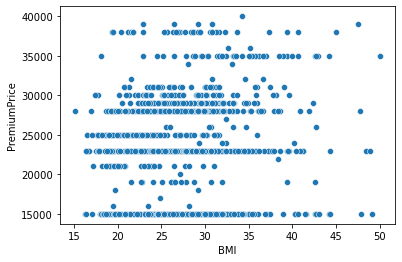

In [146]:
sns.scatterplot(x='BMI',y='PremiumPrice',data=data)

<AxesSubplot:xlabel='PremiumPrice', ylabel='Age'>

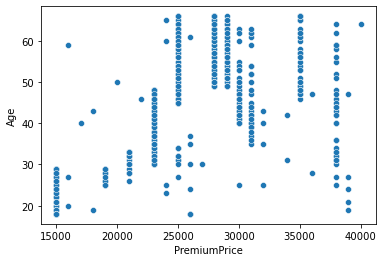

In [147]:
sns.scatterplot(x=data['PremiumPrice'],y=data['Age'])

except some points most of the prices are between specific age range.

15000 is seems like a basic amount as it is mostly paid by people i range of 18 to 30.

appr. 19000 is paid by people whos age range between 25 to 30 and so on 


In [148]:
#adding new column age range for better understanding of relationship bet age and price 
bins = [0,20,30,40,50,60,100]
data['age range'] = pd.cut(data['Age'], bins,labels=('0-20','21-30','31-40','41-50','51-60','61 and above'))
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,age range
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,41-50
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,51-60
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,31-40
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,51-60
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,31-40


[Text(0.5, 1.0, 'Age Vs Premium Price')]

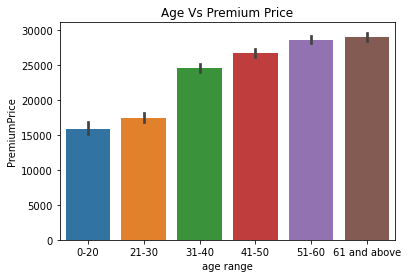

In [149]:
sns.barplot(x='age range',y='PremiumPrice',data = data).set(title='Age Vs Premium Price')

As age of a person increases, the price of the premium also increases.

[Text(0.5, 1.0, 'Number Of Major Surgeries Vs Premium Price')]

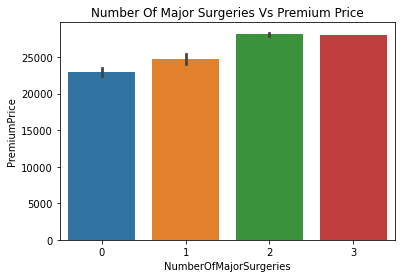

In [150]:
sns.barplot(x='NumberOfMajorSurgeries',y='PremiumPrice',data = data).set(title='Number Of Major Surgeries Vs Premium Price')

There can be seen no major changes between Number Of Major Surgeries and Premium Price. But we can conclude that people undergoing more surgeries pays a little higher premium.

Medical condition and premium price relationship

[Text(0.5, 1.0, 'Chronic Diseases Vs Premium Price')]

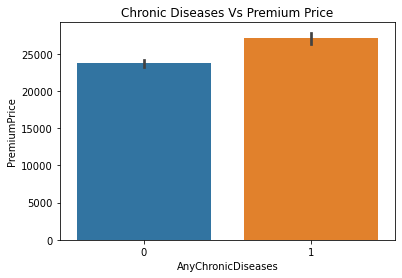

In [151]:
sns.barplot(x='AnyChronicDiseases',y='PremiumPrice',data = data).set(title='Chronic Diseases Vs Premium Price')

There can be seen no major changes between Chronic Diseases and Premium Price. But we can conclude that people having chronic diseases pays a little higher premium.

<AxesSubplot:xlabel='AnyChronicDiseases', ylabel='PremiumPrice'>

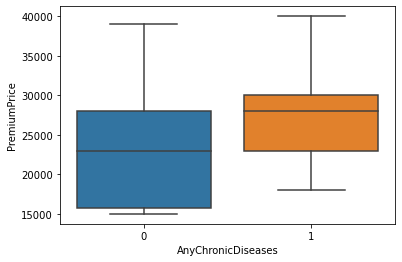

In [152]:
sns.boxplot(x=data['AnyChronicDiseases'],y=data['PremiumPrice'])

Avg premium paid by people having chronic disease is higher than people not having chronic disease

[Text(0.5, 1.0, 'No of Transplants Vs Premium Price')]

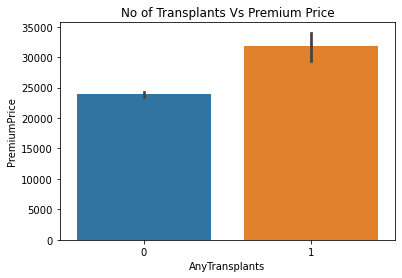

In [153]:
sns.barplot(x='AnyTransplants',y='PremiumPrice',data = data).set(title='No of Transplants Vs Premium Price')

We can conclude that People who have done a transplant pays higher premium than those who have not done any transplant.

<AxesSubplot:xlabel='AnyTransplants', ylabel='PremiumPrice'>

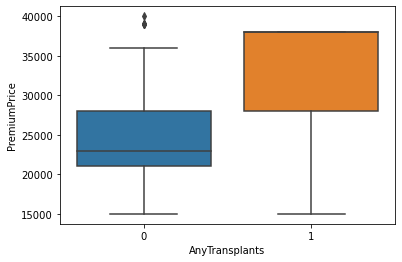

In [154]:
sns.boxplot(x=data['AnyTransplants'],y=data['PremiumPrice'])

People who have done a transplant on an avg pays higher premium than those who have not done any transplant.

[Text(0.5, 1.0, 'Diabetes Vs PremiumPrice')]

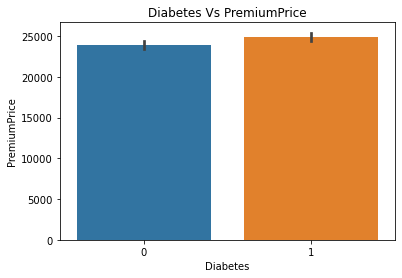

In [155]:
sns.barplot(x='Diabetes',y='PremiumPrice',data = data).set(title='Diabetes Vs PremiumPrice')

<AxesSubplot:xlabel='Diabetes', ylabel='PremiumPrice'>

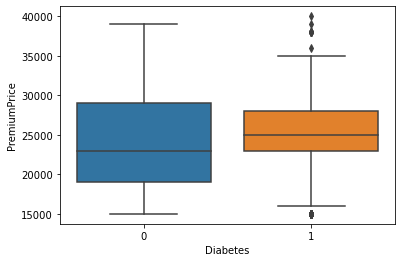

In [156]:
sns.boxplot(x=data['Diabetes'],y=data['PremiumPrice'])

People having Diabetes pays a little higher Premium.

[Text(0.5, 1.0, 'BloodPressure Vs PremiumPrice')]

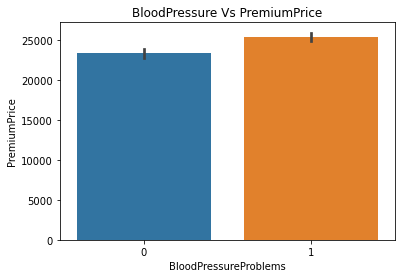

In [157]:
sns.barplot(x='BloodPressureProblems',y='PremiumPrice',data = data).set(title='BloodPressure Vs PremiumPrice')

<AxesSubplot:xlabel='BloodPressureProblems', ylabel='PremiumPrice'>

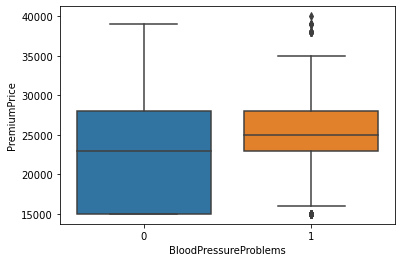

In [158]:
sns.boxplot(x=data['BloodPressureProblems'],y=data['PremiumPrice'])

There is not much relation between Blood pressure and Premium Paid. But people having Blood Pressure pays a little higher Premium.

Age vs medical conditions

[Text(0.5, 1.0, 'Diabetes Vs Age')]

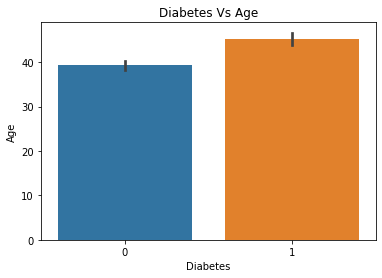

In [159]:
sns.barplot(x=data['Diabetes'],y=data['Age']).set(title='Diabetes Vs Age')

[Text(0.5, 1.0, 'Blood Pressure Vs Age')]

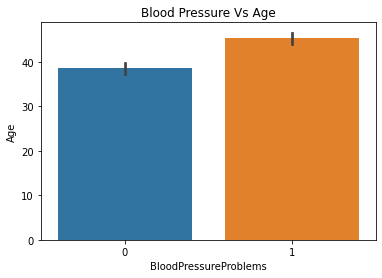

In [160]:
sns.barplot(x=data['BloodPressureProblems'],y=data['Age']).set(title='Blood Pressure Vs Age')

[Text(0.5, 1.0, 'Transplants Vs Age')]

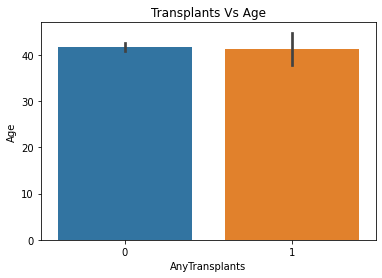

In [161]:
sns.barplot(x=data['AnyTransplants'],y=data['Age']).set(title='Transplants Vs Age')

[Text(0.5, 1.0, 'Chronic Diseases Vs Age')]

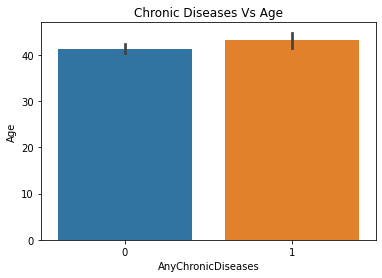

In [162]:
sns.barplot(x=data['AnyChronicDiseases'],y=data['Age']).set(title='Chronic Diseases Vs Age')

Most of the people having Blood Pressure are also more than 40 years of age.

[Text(0.5, 1.0, 'Number Of Major Surgeries Vs Age')]

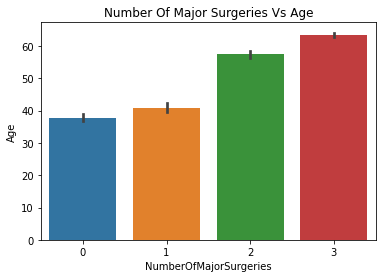

In [163]:
sns.barplot(x=data['NumberOfMajorSurgeries'],y=data['Age']).set(title='Number Of Major Surgeries Vs Age')

No of surgeries increases as age increases

In [164]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,age range
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,41-50
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,51-60
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,31-40
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,51-60
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,31-40


<AxesSubplot:xlabel='PremiumPrice', ylabel='count'>

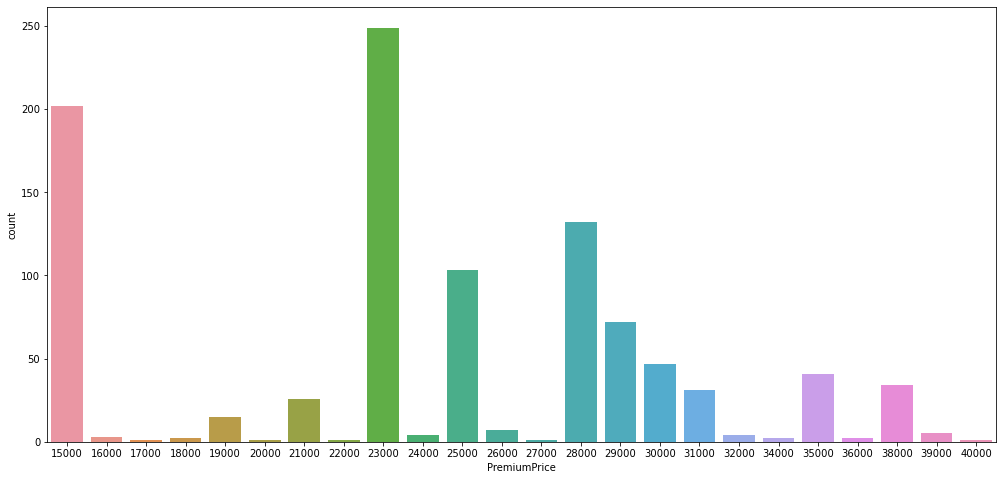

In [165]:
plt.figure(figsize=(17,8))
sns.countplot(x=data['PremiumPrice'])

cancer history vs premium price

[Text(0.5, 1.0, 'History Of Cancer In Family Vs Premium Paid')]

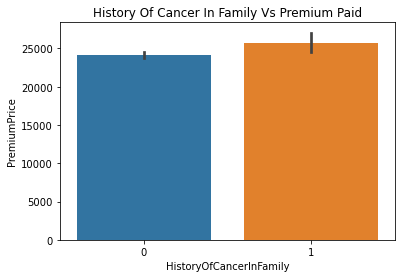

In [166]:
sns.barplot(x='HistoryOfCancerInFamily',y='PremiumPrice',data = data).set(title='History Of Cancer In Family Vs Premium Paid')

Cancer in family history doesnot affect the Premium Price much.

But from the heatmap its seen that there is a good co rellation of history of cancer family to Number Of Major Surgeries

[Text(0.5, 1.0, 'HistoryOfCancerInFamily Vs NumberOfMajorSurgeries')]

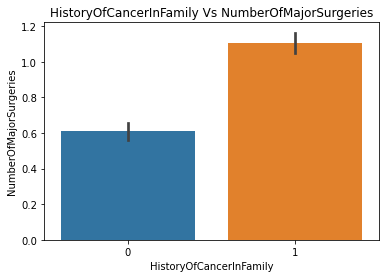

In [167]:
sns.barplot(x='HistoryOfCancerInFamily',y='NumberOfMajorSurgeries',data = data).set(title='HistoryOfCancerInFamily Vs NumberOfMajorSurgeries')

People who have Cancer in family history are more likely to undergoing Major Surgery. This concludes that people having cancer in family history may have high chances of health related problems that will lead to surgery.

and also before this we have seen that people undergoing more surgeries pays a little higher premium.


BMI(height and weight) vs premium price

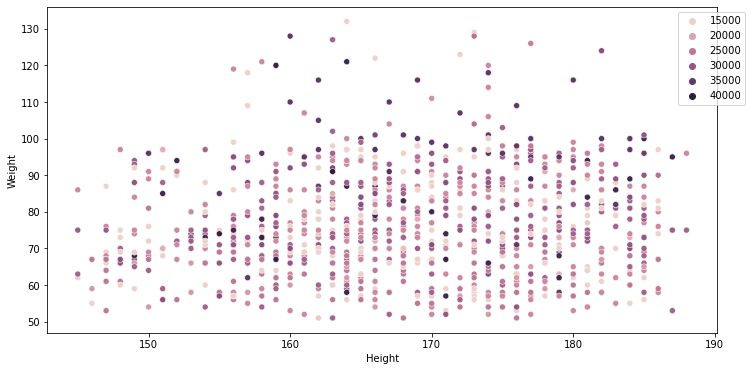

In [168]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Height',y='Weight',data=data,hue='PremiumPrice')
plt.legend(bbox_to_anchor=(1.05,1))

<AxesSubplot:xlabel='BMI', ylabel='Age'>

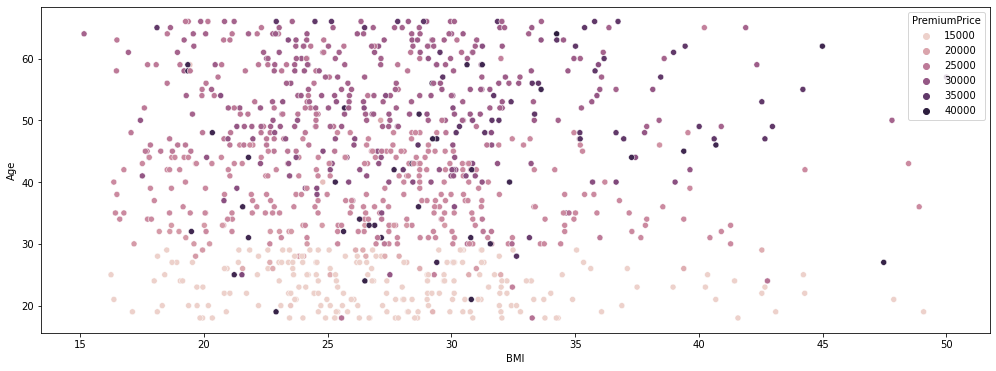

In [169]:
plt.figure(figsize=(17,6))
sns.scatterplot(x='BMI',y='Age',data=data,hue='PremiumPrice')

In [170]:
bins = [0,20,30,40,50]
data['BMI_range'] = pd.cut(data['BMI'], bins,labels=('0-20','20-30','30-40','40-50'))
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI,age range,BMI_range
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286,41-50,20-30
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864,51-60,20-30
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033,31-40,20-30
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313,51-60,20-30
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969,31-40,30-40


[Text(0.5, 1.0, 'BMI Vs Premium Price')]

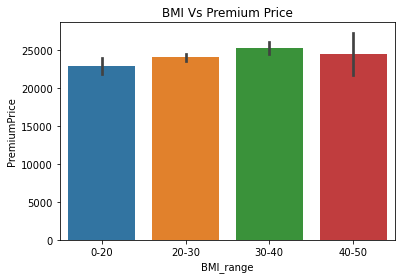

In [171]:
sns.barplot(x='BMI_range',y='PremiumPrice',data = data).set(title='BMI Vs Premium Price')

Thus no major relation can be seen between BMI and Premium Prices

Observations from EDA:

1.

# Linear regression

In [172]:
X = data.drop(['PremiumPrice','Height','Weight','age range','BMI_range'],axis = 1)
y = data['PremiumPrice']

In [173]:
def model_report(model):
    y_pred = model.predict(X_test)
    print('r2_score : ',r2_score(y_test,y_pred))
    print('MAE : ',mean_absolute_error(y_test,y_pred))
    print('MSE : ',mean_squared_error(y_test,y_pred))
    print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))

In [174]:
def scaled_model_report(model):
    y_pred = model.predict(scaled_X_test)
    print('r2_score : ',r2_score(y_test,y_pred))
    print('MAE : ',mean_absolute_error(y_test,y_pred))
    print('MSE : ',mean_squared_error(y_test,y_pred))
    print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [176]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(660, 9)
(326, 9)
(660,)
(326,)


In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
lr = LinearRegression()
lr.fit(X_train,y_train)
model_report(lr)

r2_score :  0.6630540222771447
MAE :  2646.2371832877993
MSE :  13882506.54853025
RMSE :  3725.9235832918325


In [178]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [179]:
lr2 = LinearRegression()
lr2.fit(scaled_X_train,y_train)
y_pred_lr2 = lr2.predict(scaled_X_test)
scaled_model_report(lr2)

r2_score :  0.6630540222771448
MAE :  2646.237183287799
MSE :  13882506.548530245
RMSE :  3725.923583291832


In [180]:
from scipy import stats
import statsmodels.api as sm

In [181]:
X1=sm.add_constant(X)
reg=sm.OLS(y,X1).fit()

In [182]:
reg 

In [183]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PremiumPrice   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     189.2
Date:                Fri, 27 May 2022   Prob (F-statistic):          4.73e-207
Time:                        14:54:15   Log-Likelihood:                -9518.5
No. Observations:                 986   AIC:                         1.906e+04
Df Residuals:                     976   BIC:                         1.911e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5926.8703    707.143      8.381      0.000    4539.174    7314.567
Age                       330.5127      9.931     33.283      0.000     311.025     350.000
Diabetes                 -440.0969    253.810     -1.734      0.083    -938.173      57.980
BloodPressureProblems     110.4624    254.155      0.435      0.664    -388.290     609.215
AnyTransplants           7819.8668    526.800     14.844      0.000    6786.076    8853.658
AnyChronicDiseases       2687.3368    316.933      8.479      0.000    2065.388    3309.286
KnownAllergies            306.6917    298.637      1.027      0.305    -279.354     892.737
HistoryOfCancerInFamily  2306.6544    389.055      5.929      0.000    1543.174    3070.135
NumberOfMajorSurgeries   -631.5448    187.804     -3.363      0.001   -1000.090    -263.000
BMI                       142.3228     20.616      6.903      0.000     101.866     182.780
==============================================================================
Omnibus:                      231.419   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1203.225
Skew:                           0.976   Prob(JB):                    5.28e-262
Kurtosis:                       8.048   Cond. No.                         303.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Decision tree regressor

In [184]:
from sklearn.tree import DecisionTreeRegressor
DT_model1=DecisionTreeRegressor(random_state=1)
DT_model1.fit(X_train, y_train)
DT1_y_pred=DT_model1.predict(X_test)

In [185]:
model_report(DT_model1)

r2_score :  0.4649898736513046
MAE :  1932.515337423313
MSE :  22042944.785276074
RMSE :  4694.99145742312


In [186]:
DT_model1.feature_importances_
pd.DataFrame(index=X.columns,data=DT_model1.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.640627
Diabetes,0.016480
BloodPressureProblems,0.005643
AnyTransplants,0.092098
AnyChronicDiseases,0.036777
KnownAllergies,0.004992
HistoryOfCancerInFamily,0.018698
NumberOfMajorSurgeries,0.037205
BMI,0.147480


In [187]:
DT_model2=DecisionTreeRegressor(max_depth=4,random_state=1)
DT_model2.fit(X_train,y_train)
model_report(DT_model2)

r2_score :  0.6642189494253874
MAE :  2053.14261853663
MSE :  13834510.40127444
RMSE :  3719.4771677312983


In [188]:
DT_model3 = DecisionTreeRegressor(max_leaf_nodes=7,random_state=1)
DT_model3.fit(X_train,y_train)
model_report(DT_model3)

r2_score :  0.6301738187419305
MAE :  2330.0568506988097
MSE :  15237203.357732307
RMSE :  3903.486051945403


In [189]:
DT_model4=DecisionTreeRegressor(max_depth=4,max_leaf_nodes=7,random_state=1)
DT_model4.fit(X_train, y_train)
model_report(DT_model4)

r2_score :  0.6301738187419305
MAE :  2330.0568506988097
MSE :  15237203.357732307
RMSE :  3903.486051945403


# Random forest regressor

In [190]:
from sklearn.ensemble import RandomForestRegressor

In [191]:
RF_model1=RandomForestRegressor(random_state=101)
RF_model1.fit(X_train, y_train)
model_report(RF_model1)

r2_score :  0.725146499033041
MAE :  1627.0245398773006
MSE :  11324235.27607362
RMSE :  3365.150111967313


In [192]:
pd.DataFrame(index=X.columns,data=RF_model1.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Age,0.657042
Diabetes,0.008124
BloodPressureProblems,0.006397
AnyTransplants,0.092876
AnyChronicDiseases,0.033404
KnownAllergies,0.005174
HistoryOfCancerInFamily,0.021056
NumberOfMajorSurgeries,0.030978
BMI,0.144948


In [193]:
from sklearn.model_selection import GridSearchCV

In [194]:
n_estimators=list(range(1,51))
max_features=list(range(1,11))
bootstrap=[True,False]
oob_score=[True,False]

param_grid={'n_estimators':n_estimators,
           'max_features':max_features,
           'bootstrap':bootstrap,'oob_score':oob_score}

In [ ]:
rf_grid_model=RandomForestRegressor(random_state=1)
grid=GridSearchCV(rf_grid_model,param_grid)
grid.fit(X_train,y_train)

In [ ]:
grid.best_estimator_

In [ ]:
RF_model2=RandomForestRegressor(max_features=5, n_estimators=49, oob_score=True,random_state=1)
RF_model2.fit(X_train, y_train)
model_report(RF_model2)

In [ ]:
rf_grid_model2=RandomForestRegressor(random_state=101)
grid2=GridSearchCV(rf_grid_model2,param_grid)
grid2.fit(X_train,y_train)

In [ ]:
grid2.best_estimator_

In [ ]:
RF_model3=RandomForestRegressor(max_features=5, n_estimators=50, oob_score=True,random_state=101)
RF_model3.fit(X_train, y_train)
model_report(RF_model3)

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Feature Scaling
sc = StandardScaler()
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

In [ ]:
svm_model1 = SVC(kernel = 'linear', random_state = 101)
svm_model1.fit(scaled_X_train, y_train)
scaled_model_report(svm_model1)

In [ ]:
svm_model2 = SVC(kernel = 'rbf', random_state = 101)
svm_model2.fit(scaled_X_train, y_train)
scaled_model_report(svm_model2)